# Logistic Regression Exercise

Now it's your turn to implement logistic regression on a new data set. For this purpose we use the Titanic Dataset. It includes personal information of all passengers on the Titanic as well as they survived the sinking of the Titanic or died.

Here’s the **Data Dictionary** of the dataset:

- PassengerID: type should be integers

- Survived: survived or not

- Pclass: class of Travel of every passenger

- Name: the name of the passenger

- Sex: gender

- Age: age of passengers

- SibSp: No. of siblings/spouse aboard

- Parch: No. of parent/child aboard

- Ticket: Ticket number

- Fare: what Prices they paid

- Cabin: cabin number

- Embarked: the port in which a passenger has embarked.

        - C: Cherbourg , S: Southampton , Q: Queenstown


You will find the data in the data folder (it's a zip folder, so you first have to unzip it).


## What you should do:

- conduct a brief EDA to become familiar with the data
- use Logistic Regression to predict if a passenger died or not

## How to do it:

Time is short, so aim for the simplest viable product first:
- Load the data

- Get a quick overview of the data

- Agree on a classification metric for the task 

- Create a simple heuristic/educated guess for the classification first. This is called a "baseline model". It is used to compare more complex models later (in this case: logistic regression). You as a data scientist want to prove how much your work/ML could improve the business metric, therefore you need a baseline model for comparison. In some cases you want to improve on an already existing model in your company which would be your baseline model then. In other cases, there are typical baseline models used in the specific field. For other tasks, you have to come up with a simple but meaningful idea, how to classify the data based on your business understanding (EDA). A baseline model should follow Occam’s Razor principle: "A simple model is the best model". 
    - Example of a baseline model: 
    If the task is to classify cats and dogs, a baseline model could be: We classify every animal as cat if its weight < 5 kg, otherwise the animal is classified as a dog. (The value of 5 kg is an educated guess, based on our business understanding/EDA.) 

- use one or two already numerical features to create a simple first model
    -  did it even beat your base model?

- Now you can go through the data science lifecycle again and again:
    - clean the data better

    - get more insights with EDA

    - add more features

    - do feature engineering 
    
    and check if your work improves your model further!

- Stop whenever time is up or you cannot improve your model any further.

The next notebook contains a solution to this problem. If you want to compare your final result with the result of this notebook, choose **25** as random seed and a test size of 30% for your train test split.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, recall_score, precision_score, roc_auc_score, roc_curve, f1_score

In [4]:
# load data
import zipfile
with zipfile.ZipFile('data.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [42]:
df = pd.read_csv('data/data/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Missing values for age (around 177) and cabin (687) and 2 for embarked. Data types are all correct, besides sex and embarked which need to be ordinal encoded.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The number of siblings and parents on board seem to be very unbalanced with some extreme outliers. Also Fare might have some outliers.

In [19]:
df.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

This shows, that passengerIDs are unique for every entry, so they can be used as an index, target (Survived) is binary. Ticket provides the information that a lot passengers must have been travelled on the same ticket, as there are no missing values but only 681 unique ticket numbers.

<Axes: xlabel='Survived', ylabel='count'>

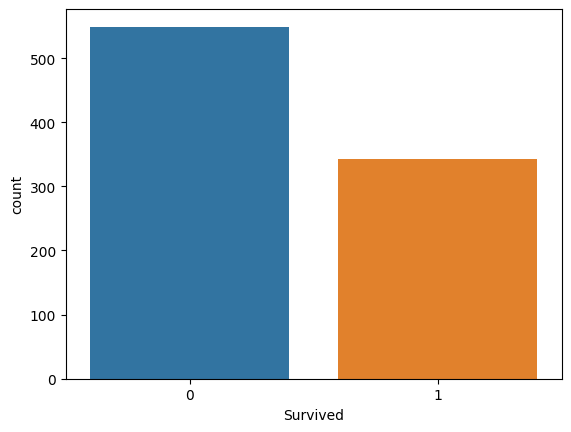

In [21]:
sns.countplot(x = df.Survived)

With this countplot it is abbvious that the target is not balanced as a lot more passangers died than survived. So we need to stratify for y in splitting.

Start - First splitting dataset into features and target and second in train, val  and test
As the target is not balanced accuracy will not be a good metric. The model aims to predict if a passenger died or survived, so it is **important not to misclassify a survivor as dead (False negative)** but also **not to misclassify a lot drowned persons as survivor (False positive)**. We need a good balance so the **F1-Score is a perfect metric**.

In [43]:
features = df.columns.drop('Survived')
X = df[features]
Y = df.Survived
print (X.shape, Y.shape)

(891, 11) (891,)


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify = Y, random_state = 30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(668, 11) (223, 11) (668,) (223,)


In [45]:
# convert strings of column sex into integer to be able to build the baseline model upon that parameter
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False, drop='first')
sex_encoded = ohe.fit_transform(X_train[['Sex']])

C:\Users\Jennifer\Documents\Job\Spiced\machine_learning\.venv\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [50]:
sex_encoded_test= ohe.transform(X_test[['Sex']])
df_sex_test = pd.DataFrame(sex_encoded_test, columns = ohe.get_feature_names_out(['Sex']))
X_test.reset_index(drop=True, inplace = True)
X_test = pd.concat([X_test, df_sex_test], axis = 1)
X_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,1.0
1,144,3,"Burke, Mr. Jeremiah",male,19.0,0,0,365222,6.7500,NaN,Q,1.0
2,541,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S,0.0
3,524,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C,0.0
4,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.0,1,0,350046,7.8542,NaN,S,0.0


In [47]:
df_sex_encoded = pd.DataFrame(sex_encoded, columns = ohe.get_feature_names_out(['Sex']))
df_sex_encoded.reset_index(inplace = True, drop=True)
df_sex_encoded

,Sex_male
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
663,1.0
664,1.0
665,1.0
666,1.0


In [48]:
X_train.reset_index(drop=True, inplace=True)
X_train = pd.concat([X_train, df_sex_encoded], axis=1)
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,626,1,"Sutton, Mr. Frederick",male,61.0,0,0,36963,32.3208,D50,S,1.0
1,106,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S,1.0
2,244,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S,1.0
3,69,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S,0.0
4,802,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
663,271,1,"Cairns, Mr. Alexander",male,NaN,0,0,113798,31.0000,NaN,S,1.0
664,476,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.0000,A14,S,1.0
665,13,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,NaN,S,1.0
666,621,3,"Yasbeck, Mr. Antoni",male,27.0,1,0,2659,14.4542,NaN,C,1.0


In [53]:
# baseline model
lr = LogisticRegression()
lr.fit(X_train[['Sex_male']], y_train)
y_pred = lr.predict(X_test[['Sex_male']])

Accuracy 0.757847533632287
Recall 0.6395348837209303
Precision 0.7051282051282052
F1-Score 0.6707317073170733
Report               precision    recall  f1-score   support

           0       0.79      0.83      0.81       137
           1       0.71      0.64      0.67        86

    accuracy                           0.76       223
   macro avg       0.75      0.74      0.74       223
weighted avg       0.75      0.76      0.76       223



<Axes: >

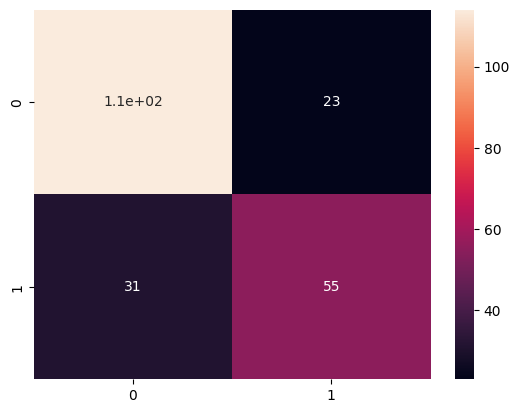

In [60]:
print('Accuracy', accuracy_score(y_test, y_pred))
print('Recall', recall_score(y_test, y_pred))
print('Precision', precision_score(y_test, y_pred))
print('F1-Score', f1_score(y_test, y_pred))
print('Report', classification_report(y_test, y_pred))
conf_mtx = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mtx, annot=True)

Thes baseline model, which predicts the survival upon the sex misclassifies in both directions almost equally, 23 passengers were wrongly labeled as survivor (Precision 0,71) and 31 wrongly as dead although they survived (Recall 0,64).
**The overall metric (F1-SCore) is 0,67 for the baseline model, therfore it is better than guessing but still a lot can be improved.**